In [77]:
import nwslpy
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from common import NWSL, Fonts, Colors, Images, add_twitter_handle, add_source

In [2]:
# Generate dataset which is a table showing the frequency with which each goal count appeared
N = 42
matches = nwslpy.load_matches()

df = pd.DataFrame([])
for season in matches["season"].unique():
    if "Challenge" in season or "Fall" in season:
        continue
    season_matches = matches[matches["season"] == season]
    season_matches = season_matches.sort_values("kickoff")
    subset = season_matches[:N]
    subset["goals"] = subset["home_team_score"] + subset["away_team_score"]
    agg = subset.groupby("goals").agg(goals=("goals", "count")).rename(columns={"goals": season}).T
    df = df.append(agg)
    
df = df.fillna(0)
df = df.astype(int)
    
df

<ipython-input-2-c5712d57df3e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["goals"] = subset["home_team_score"] + subset["away_team_score"]


goals,0,1,2,3,4,5,6,7,8
2016,4,14,10,9,3,1,0,1,0
2017,1,10,17,3,6,2,1,1,1
2018,3,10,14,6,2,4,1,2,0
2019,4,8,13,8,5,3,0,0,1
2021,3,10,14,11,2,2,0,0,0
2022,4,13,6,9,7,2,1,0,0
2023,3,8,10,7,7,3,3,1,0


<Figure size 720x576 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

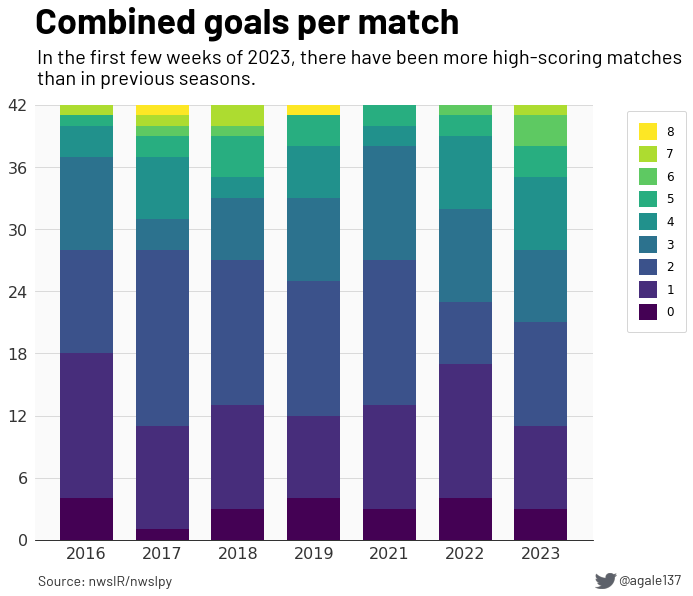

In [87]:
plt.clf()
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=200, facecolor="white")
fig, ax = plt.subplots()
fig.patch.set_facecolor("white")
ax.set_facecolor(Colors.WHITE)

cmap = matplotlib.cm.get_cmap("viridis")

rgba = cmap(0.5)
bottom = np.zeros(len(df.index))

# Plot each metric
for i in df.columns:
    ax.bar(
        df.index,
        df[i],
        color=cmap(i / (len(df.columns) - 1)),
        bottom=bottom,
        label=i,
        width=0.7,
    )
    bottom += np.array(df[i].values)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    reversed(handles),
    reversed(labels),
    bbox_to_anchor=(1.05, 1.0),
    loc="upper left",
    borderpad=1,
    handlelength=1.5,
    handleheight=1.75,
    fontsize=12,
)

# Axes and ticks
ax.spines[["top", "left", "right"]].set_visible(False)
ax.set_axisbelow(True)
ax.set_yticks(list(map(lambda x: x * 6, range(0, int(N / 6) + 1))))
ax.yaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.tick_params(axis="both", which="major", labelsize=16, labelcolor=Colors.BLACK)
ax.tick_params(bottom=False, left=False)


# Title
ax.set_title(
    "Combined goals per match",
    fontproperties=Fonts.BARLOW_BOLD,
    size=36,
    ha="left",
    x=0,
    y=1.15,
)

# Subtitle
ax.text(
    -0.65,
    44,
    "In the first few weeks of 2023, there have been more high-scoring matches\nthan in previous seasons.",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.9, y=0.04, fs=14, w=0.03)
add_source(fig, "nwslR/nwslpy", x=0.13, y=0.04, fs=14)

# Save image
plt.savefig(
    "images/goals_frequency.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)